In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install ultralytics

zsh:1: command not found: pip


Data Preprocessing and Model training

In [ ]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from ultralytics import YOLO

class MoonRocksDataset(Dataset):
    def __init__(self, img_dir, label_dir, img_size=640, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.img_size = img_size
        self.transform = transform
        self.imgs = os.listdir(img_dir)

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.imgs[idx])
        label_path = os.path.join(self.label_dir, self.imgs[idx].replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        if img is None:
            print(f"Error: Could not load image at path: {img_path}")
            img = np.zeros((self.img_size, self.img_size, 3), dtype=np.uint8)
            boxes = torch.empty((0, 5))
            return img, boxes

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.img_size, self.img_size))
        img = img / 127.5 - 1.0
        img = np.transpose(img, (2, 0, 1))
        img = torch.tensor(img, dtype=torch.float32)

        boxes = self.load_labels(label_path)
        return img, boxes

    def load_labels(self, label_path):
        boxes = []
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    cls, x, y, w, h = map(float, line.strip().split())
                    boxes.append([cls, x, y, w, h])
        return torch.tensor(boxes) if boxes else torch.empty((0, 5))

def create_data_yaml(img_dir, label_dir, yaml_path):
    with open(yaml_path, 'w') as f:
        f.write(f"train: {img_dir}/train\n")
        f.write(f"val: {img_dir}/val\n")
        f.write("nc: 1\n")  # Number of classes
        f.write("names: ['moon_rock']\n")  # Class names

if __name__ == '__main__':
    img_dir = '/content/drive/MyDrive/data/images'
    label_dir = '/content/drive/MyDrive/data/labels'
    yaml_path = '/content/drive/MyDrive/data/data.yaml'

    # Create data.yaml file
    create_data_yaml(img_dir, label_dir, yaml_path)

    # Load the YOLOv8 model
    model = YOLO('yolov8l.pt')  # Pre-trained YOLOv8s weights

    # Start training using the data.yaml configuration
    model.train(data=yaml_path, epochs=50, imgsz=640, batch=16, lr0=0.001)  # Adjust epochs and image size as needed

    model.save('/content/yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 191MB/s]


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/drive/MyDrive/data/labels/train.cache... 57 images, 0 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/data/labels/val.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.5G      1.938      4.236      1.469         79        640: 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         19        135     0.0744     0.0296     0.0147    0.00532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.1G      1.938      4.058      1.397         74        640: 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         19        135      0.128     0.0296     0.0153    0.00607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.3G      1.915      10.55      1.328         76        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         19        135     0.0156     0.0444    0.00404    0.00216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.5G      1.762      3.255      1.293         81        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         19        135      0.019        0.8     0.0207     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.6G      1.447      2.173      1.178         75        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         19        135     0.0452      0.311     0.0267      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.7G       1.32       1.84      1.079         53        640: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         19        135     0.0211      0.548     0.0161     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.8G      1.413      1.622      1.144         74        640: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         19        135      0.243      0.385       0.15     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.6G      1.385      1.498      1.091         75        640: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         19        135      0.135      0.207     0.0757     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.7G      1.409      1.309      1.107         77        640: 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         19        135   0.000526     0.0222   0.000284   8.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.7G      1.316      1.164      1.158         73        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         19        135   0.000526     0.0222   0.000284   8.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.7G      1.347      1.128      1.086         72        640: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         19        135   0.000526     0.0222   0.000284   8.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.8G      1.406      1.334      1.162         34        640: 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         19        135    0.00181     0.0444     0.0009   0.000392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.7G      1.383      1.267      1.112         72        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         19        135    0.00181     0.0444     0.0009   0.000392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.7G      1.391      1.239      1.129         68        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         19        135    0.00181     0.0444     0.0009   0.000392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.6G      1.239       1.08      1.016         68        640: 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         19        135    0.00181     0.0444     0.0009   0.000392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.5G      1.306      1.202      1.052         72        640: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         19        135    0.00181     0.0444     0.0009   0.000392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.7G      1.381      1.103      1.131         49        640: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         19        135    0.00181     0.0444     0.0009   0.000392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.7G       1.33      1.006      1.081        105        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         19        135      0.504      0.111      0.112     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.6G      1.224      1.083      1.031         49        640: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         19        135      0.488        0.2      0.201      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.7G      1.243      1.122      1.049         83        640: 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         19        135      0.452      0.304      0.266      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G      1.348      1.085      1.085         51        640: 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         19        135      0.575       0.32      0.356      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.5G      1.225     0.8917       1.05         53        640: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         19        135      0.308        0.2      0.151     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.5G       1.39      1.015       1.16         56        640: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         19        135      0.409      0.311      0.273      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.5G      1.217      0.978       1.03         77        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         19        135      0.561       0.57      0.582      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.5G      1.209     0.9793      1.049         71        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         19        135      0.675      0.538      0.617      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.5G      1.135     0.8919     0.9796         69        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         19        135      0.696      0.577      0.627      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.6G      1.307     0.9621      1.089         68        640: 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         19        135      0.607      0.595      0.608      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.5G      1.192     0.9131      1.037         45        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         19        135      0.663      0.437      0.516      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.5G      1.233     0.8885      1.065         44        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         19        135      0.639      0.481      0.515      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.6G      1.145     0.9389      1.059         53        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         19        135      0.718      0.508      0.584      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.5G       1.19     0.8759      1.027         58        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         19        135      0.576      0.519      0.556      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.5G      1.079     0.7749      0.965        109        640: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         19        135      0.554      0.444      0.475      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.6G      1.154     0.9057      1.082         35        640: 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         19        135      0.759      0.396      0.446      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.5G      1.173     0.7855      1.008         80        640: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         19        135      0.699      0.437      0.478      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.5G       1.15     0.8748     0.9988        100        640: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         19        135      0.585      0.511      0.514      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.5G      1.131     0.7694     0.9479         95        640: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         19        135       0.51      0.452      0.465      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.5G      1.113     0.7797     0.9852        111        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         19        135      0.495      0.519      0.473      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.5G      1.142     0.8946      1.019         67        640: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         19        135      0.613      0.467      0.504      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.5G      1.127     0.7891      1.034         93        640: 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         19        135      0.679      0.517      0.573      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.5G      1.012     0.7305     0.9709         86        640: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         19        135      0.779      0.474      0.599      0.369


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.6G      1.027     0.7501     0.9868         85        640: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         19        135      0.783      0.526      0.649      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.6G     0.9972     0.7393      1.002         53        640: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         19        135      0.783      0.563      0.665      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.6G      1.039     0.7214     0.9832         91        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         19        135      0.745      0.578       0.67      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.6G     0.9537     0.7165     0.9949         45        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         19        135      0.783      0.593      0.691      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.6G     0.9366     0.6573     0.9432         74        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         19        135      0.739      0.587      0.697      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.6G      1.025     0.7085     0.9555         56        640: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         19        135      0.719      0.606      0.705      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.5G     0.9578     0.6349     0.9503         58        640: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         19        135       0.73        0.6       0.71      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.5G     0.9562     0.6535     0.9683         38        640: 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         19        135      0.726      0.622      0.713      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.9G     0.9119     0.6336      0.959         55        640: 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         19        135      0.729      0.652      0.724      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.6G     0.9226     0.6333     0.9536         60        640: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         19        135      0.752      0.644       0.73      0.478



50 epochs completed in 0.100 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 87.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


                   all         19        135      0.752      0.644       0.73      0.478
Speed: 0.2ms preprocess, 18.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


testing

In [7]:
import cv2
import torch
from ultralytics import YOLO
import os
import numpy as np

def process_video(model, video_path, output_path, conf_threshold=0.25, alpha=0.4):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video at path: {video_path}")
        return

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Set up output video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    # Process each frame in the video
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize the frame to the expected size (640x640)
        img_resized = cv2.resize(frame, (640, 640))

        # Convert the resized frame to tensor format
        img_tensor = torch.tensor(img_resized / 255.0).permute(2, 0, 1).unsqueeze(0)

        # Make predictions
        results = model(img_tensor)

        # Extract predictions
        boxes = results[0].boxes
        detections_info = []

        # Create a copy of the original frame for overlay
        overlay = frame.copy()  # Use original frame for overlay

        if boxes is not None and len(boxes) > 0:
            for box in boxes.data.tolist():
                # Each box is [x1, y1, x2, y2, confidence, class_id]
                x1, y1, x2, y2, conf, class_id = box

                if conf >= conf_threshold:
                    # Scale bounding box coordinates back to original frame size
                    x1 = int(x1 * frame_width / 640)
                    y1 = int(y1 * frame_height / 640)
                    x2 = int(x2 * frame_width / 640)
                    y2 = int(y2 * frame_height / 640)

                    # Draw a semi-transparent rectangle (mask) on the detected area
                    cv2.rectangle(overlay, (x1, y1), (x2, y2), (255, 0, 0), -1)

                    # Draw the bounding box and label on the frame
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    label = f"moon rock: {conf:.2f}"
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Combine the original frame and overlay with transparency
        frame_masked = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)



        # Write the processed frame to the output video
        out.write(frame_masked)

    # Release resources
    cap.release()
    out.release()
    print(f"Processed video saved to: {output_path}")

if __name__ == '__main__':
    # Load the trained YOLOv8 model
    model = YOLO('/content/yolov8l.pt')  # Update with your model path

    # Paths to input video and output video
    video_path = '/content/1.mp4'  # Update with your input video path
    output_path = '/content/output_video3.mp4'

    # Process the video
    process_video(model, video_path, output_path, conf_threshold=0.2)



0: 640x640 11 moon_rocks, 62.6ms
Speed: 2.3ms preprocess, 62.6ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 moon_rocks, 62.7ms
Speed: 2.2ms preprocess, 62.7ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 moon_rocks, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 moon_rocks, 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 moon_rocks, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 moon_rocks, 31.1ms
Speed: 2.2ms preprocess, 31.1ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 moon_rocks, 31.2ms
Speed: 2.3ms preprocess, 31.2ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 moon_rocks, 31.3ms
Speed: 2.2ms preprocess, 31.3ms inference, 6.1ms p


0: 640x640 13 moon_rocks, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


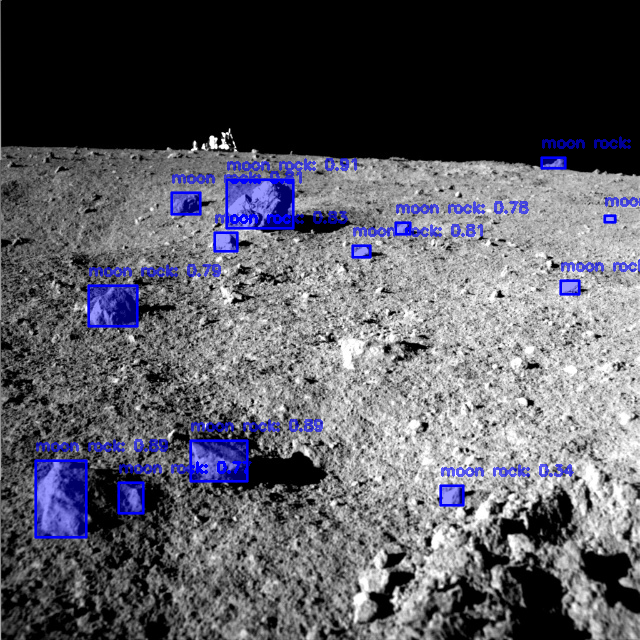

Saved processed image to: /content/output_images/1 (37).jpg
Detections for /content/drive/MyDrive/data/images/train/1 (37).jpg:
Class: moon_rock, Confidence: 0.91
Class: moon_rock, Confidence: 0.89
Class: moon_rock, Confidence: 0.89
Class: moon_rock, Confidence: 0.83
Class: moon_rock, Confidence: 0.81
Class: moon_rock, Confidence: 0.81
Class: moon_rock, Confidence: 0.79
Class: moon_rock, Confidence: 0.78
Class: moon_rock, Confidence: 0.77
Class: moon_rock, Confidence: 0.77
Class: moon_rock, Confidence: 0.56
Class: moon_rock, Confidence: 0.55
Class: moon_rock, Confidence: 0.34

0: 640x640 3 moon_rocks, 57.7ms
Speed: 2.4ms preprocess, 57.7ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


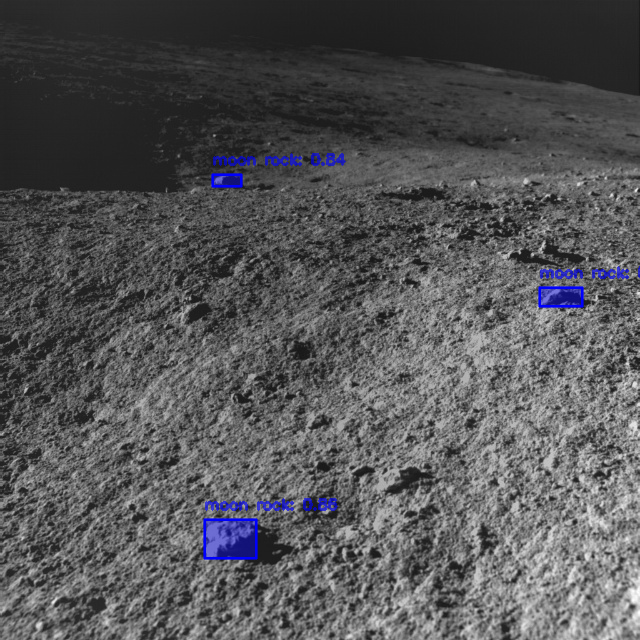

Saved processed image to: /content/output_images/1 (11).jpg
Detections for /content/drive/MyDrive/data/images/train/1 (11).jpg:
Class: moon_rock, Confidence: 0.86
Class: moon_rock, Confidence: 0.84
Class: moon_rock, Confidence: 0.71

0: 640x640 17 moon_rocks, 57.8ms
Speed: 2.9ms preprocess, 57.8ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)


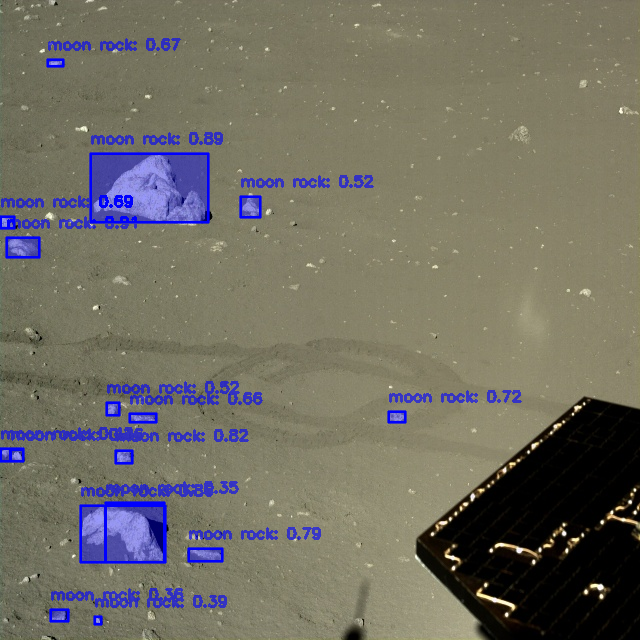

Saved processed image to: /content/output_images/1 (53).jpg
Detections for /content/drive/MyDrive/data/images/train/1 (53).jpg:
Class: moon_rock, Confidence: 0.91
Class: moon_rock, Confidence: 0.89
Class: moon_rock, Confidence: 0.86
Class: moon_rock, Confidence: 0.82
Class: moon_rock, Confidence: 0.79
Class: moon_rock, Confidence: 0.72
Class: moon_rock, Confidence: 0.69
Class: moon_rock, Confidence: 0.67
Class: moon_rock, Confidence: 0.66
Class: moon_rock, Confidence: 0.52
Class: moon_rock, Confidence: 0.52
Class: moon_rock, Confidence: 0.46
Class: moon_rock, Confidence: 0.42
Class: moon_rock, Confidence: 0.39
Class: moon_rock, Confidence: 0.36
Class: moon_rock, Confidence: 0.35

0: 640x640 12 moon_rocks, 57.8ms
Speed: 4.7ms preprocess, 57.8ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)


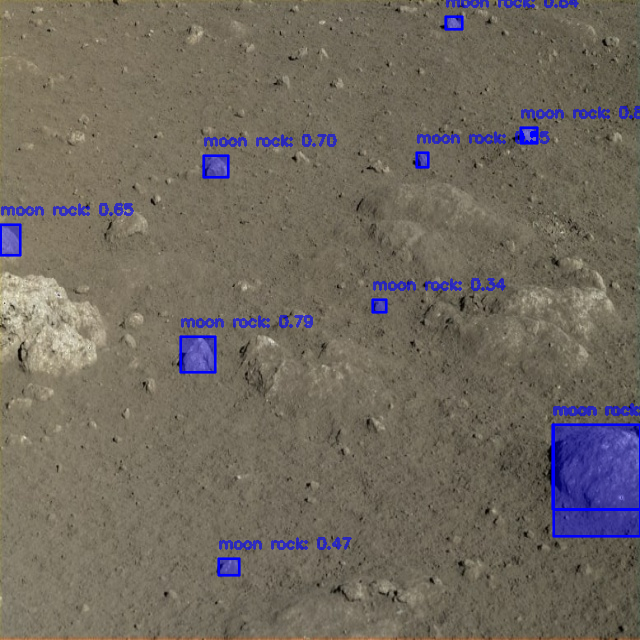

Saved processed image to: /content/output_images/1 (48).jpg
Detections for /content/drive/MyDrive/data/images/train/1 (48).jpg:
Class: moon_rock, Confidence: 0.86
Class: moon_rock, Confidence: 0.84
Class: moon_rock, Confidence: 0.79
Class: moon_rock, Confidence: 0.70
Class: moon_rock, Confidence: 0.65
Class: moon_rock, Confidence: 0.55
Class: moon_rock, Confidence: 0.47
Class: moon_rock, Confidence: 0.46
Class: moon_rock, Confidence: 0.43
Class: moon_rock, Confidence: 0.34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import torch
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import os
from google.colab import files
import shutil
import numpy as np

def test_image(model, image_path, output_dir, img_size=640, conf_threshold=0.3):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at path: {image_path}")
        return

    # Resize and normalize the image
    img_resized = cv2.resize(img, (img_size, img_size))
    img_tensor = torch.tensor(img_resized / 255.0).permute(2, 0, 1).unsqueeze(0)

    # Make predictions
    results = model(img_tensor)

    # Extract predictions
    boxes = results[0].boxes  # Get boxes from the results
    detections_info = []  # To store bounding box info

    # Create a copy of the image to overlay the mask
    overlay = img.copy()

    if boxes is not None and len(boxes) > 0:
        for box in boxes.data.tolist():
            # Each box is [x1, y1, x2, y2, confidence, class_id]
            x1, y1, x2, y2, conf, class_id = box

            if conf >= conf_threshold:
                # Draw a semi-transparent rectangle (mask) on the detected area
                cv2.rectangle(overlay, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), -1)  # Blue mask

                # Prepare the bounding box information for printing
                box_info = {
                    "class": model.names[int(class_id)],
                    "confidence": conf,
                }
                detections_info.append(box_info)

                # Draw the bounding box with blue color
                cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

                # Overlay label and confidence score on the image
                label = f"moon rock: {conf:.2f}"
                cv2.putText(img, label,
                            (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    else:
        print("No detections found.")

    # Combine the original image and overlay with transparency
    alpha = 0.4  # Transparency factor
    img_masked = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0)

    # Show the image with bounding boxes and masked regions using cv2_imshow
    cv2_imshow(img_masked)  # Display the masked image

    # Save the processed image with mask
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, img_masked)
    print(f"Saved processed image to: {output_path}")

    # Print detection information
    print(f"Detections for {image_path}:")
    for detection in detections_info:
        print(f"Class: {detection['class']}, Confidence: {detection['confidence']:.2f}")

if __name__ == '__main__':
    # Load the trained YOLOv8 model
    model = YOLO('/content/yolov8l.pt')  # Update with your model path

    # Create an output directory
    output_dir = '/content/output_images'
    os.makedirs(output_dir, exist_ok=True)

    # Path to the images you want to test
    test_image_paths = [
        '/content/drive/MyDrive/data/images/train/1 (37).jpg',
        '/content/drive/MyDrive/data/images/train/1 (11).jpg',
        '/content/drive/MyDrive/data/images/train/1 (53).jpg',
        '/content/drive/MyDrive/data/images/train/1 (48).jpg'
    ]

    # Test the images
    for test_image_path in test_image_paths:
        test_image(model, test_image_path, output_dir)

    # Create a ZIP file of the processed images
    shutil.make_archive('processed_images', 'zip', output_dir)

    # Download the ZIP file
    files.download('processed_images.zip')



In [ ]:
# Install YOLOv8 and Gradio
import locale
def getpreferredencoding(do_setlocale=True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install ultralytics gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
# Import YOLOv8 and load the model
from ultralytics import YOLO

# Load your custom YOLOv8 model
model = YOLO("/content/yolov8l.pt")  # Replace with your model path


In [ ]:
from PIL import Image
import numpy as np

def predict(image):
    # Run inference on the uploaded image
    results = model(image)

    # Annotate the image with detection boxes
    # Convert result to an image with annotations
    annotated_image = results[0].plot()  # This should generate the annotated image

    # Convert numpy array back to PIL Image for display
    return Image.fromarray(annotated_image)


In [ ]:
import gradio as gr

# Define Gradio interface
interface = gr.Interface(
    fn=predict,                   # The function to call on submit
    inputs=gr.Image(type="pil"),  # Input type for the image # Changed from gr.inputs.Image to gr.Image
    outputs=gr.Image(type="numpy"), # Output type for annotated image # Changed from gr.outputs.Image to gr.Image
    title="MOON ROCK OBSTACLE DETECTION",
    description="Upload an lunar surface image to detect moon rocks as obstacles."
)

# Launch the interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3cfbfa3355bcaffda4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
